In [6]:
#final output contains the merged file for sulfate, nitrate and the metadata etc.
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             mean_absolute_percentage_error, explained_variance_score, 
                             max_error, mean_squared_log_error, median_absolute_error, 
                             r2_score, mean_poisson_deviance, mean_gamma_deviance)

In [7]:
df = pd.read_excel('/Users/defne/Downloads/final_output.xlsx')
# Remove the Unnamed: 0 and Datetime columns
df = df.drop(columns=['Unnamed: 0', 'Datetime'])

In [8]:
for colname in df.columns:
    df = df[pd.to_numeric(df[colname], errors='coerce').notnull()]

In [9]:
df.columns

Index(['Milano_Cu_Obs', 'Lat', 'Lon', 'Cu', 'T', 'RH', 'P', 'WS', 'WD', 'PBLH',
       '01-agriculture_mean', '02-barren_mean', '03-industrial_transport_mean',
       '04-natural_areas_mean', '05-snow_ice_mean', '06-urban_fabric_mean',
       '07-urban_green_mean', '08-water_mean', '09-wetlands_mean',
       '10-IMD_Fraction', 'rc_1_100', 'rc_1_1000', 'rc_1_10000', 'rc_1_200',
       'rc_1_2000', 'rc_1_300', 'rc_1_400', 'rc_1_50', 'rc_1_500', 'rc_1_5000',
       'rc_1_700', 'rc_2_100', 'rc_2_1000', 'rc_2_10000', 'rc_2_200',
       'rc_2_2000', 'rc_2_300', 'rc_2_400', 'rc_2_50', 'rc_2_500', 'rc_2_5000',
       'rc_2_700', 'rc_3_100', 'rc_3_1000', 'rc_3_10000', 'rc_3_200',
       'rc_3_2000', 'rc_3_300', 'rc_3_400', 'rc_3_50', 'rc_3_500', 'rc_3_5000',
       'rc_3_700', 'NO3-', 'SO42-'],
      dtype='object')

In [10]:
df.shape

(1672, 55)

In [11]:
#Initial version without the cross validation
# Define the variable to predict (Nitrate) and features
y = df['SO42-'] 
X = df.drop(columns=['SO42-'])  # Drop the target column from the features

# Split the data into training and validation sets
xv = X.sample(frac=0.2)        # X for validation (20%)
xx = X.drop(xv.index)          # X for training (80%)
yv = y.loc[xv.index]           # Y for validation (20%)
yx = y.drop(xv.index)          # Y for training (80%)

# Initialize and train the RandomForestRegressor
regr = RandomForestRegressor(max_depth=200, random_state=666) # Need to tune these parameters
regr.fit(xx, yx)  # Train with training data (80%)

# Make predictions
y_tra = regr.predict(xx)  # Predictions on training set
y_val = regr.predict(xv)  # Predictions on validation set


0.7604181338754341
Mean Absolute Error (MAE): 0.5239359683583606
Mean Squared Error (MSE): 0.7845557274999756
Root Mean Squared Error (RMSE): 0.8857515043735323


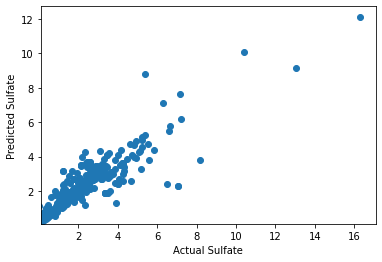

In [12]:
# Evaluate the model
print(regr.score(xv, yv))
print('Mean Absolute Error (MAE):', mean_absolute_error(yv, y_val))
print('Mean Squared Error (MSE):', mean_squared_error(yv, y_val))
print('Root Mean Squared Error (RMSE):', mean_squared_error(yv, y_val, squared=False))

# Plot results
plt.figure()
plt.scatter(yv, y_val)
plt.xlabel('Actual Sulfate')
plt.ylabel('Predicted Sulfate')
plt.xlim(0.1)
plt.ylim(0.1)
plt.show()


In [13]:
#Implementing cross validation
df = pd.read_excel('/Users/defne/Downloads/final_output.xlsx')
# Remove the Unnamed: 0 and Datetime columns
df = df.drop(columns=['Unnamed: 0', 'Datetime'])
for colname in df.columns:
    df = df[pd.to_numeric(df[colname], errors='coerce').notnull()]

In [14]:
from sklearn.model_selection import cross_val_score
# Define the target variable (Nitrate) and features
y = df['SO42-']  
X = df.drop(columns=['SO42-'])  # Drop the target column from the features

# Initialize the RandomForestRegressor
regr = RandomForestRegressor(max_depth=200, random_state=666) #Need to tune these parameters

# Perform cross-validation
cv_scores = cross_val_score(regr, X, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Train the model on the entire dataset
regr.fit(X, y)

Cross-validation scores: [0.92943087 0.68555889 0.38800152 0.8725724  0.90450096]
Mean CV Score: 0.7560129274755216


RandomForestRegressor(max_depth=200, random_state=666)

In [15]:
#Demonstrating the performance after cross validation
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=666)

In [16]:
# Train on training data and evaluate on validation data
# Initialize the RandomForestRegressor
regr = RandomForestRegressor(max_depth=200, random_state=666)
regr.fit(X_train, y_train)
y_val_pred = regr.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

0.6303885235460589
Mean Absolute Error (MAE): 0.5353621574662097
Mean Squared Error (MSE): 1.4775176411375268
Root Mean Squared Error (RMSE): 1.2155318346869928


ValueError: x and y must be the same size

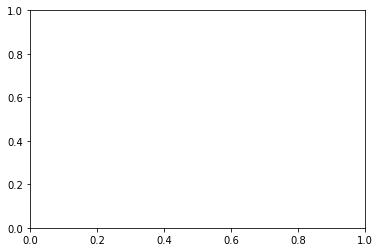

In [17]:
# Evaluate the model
print(regr.score(X_val, y_val))
print('Mean Absolute Error (MAE):',val_mae)
print('Mean Squared Error (MSE):', val_mse)
print('Root Mean Squared Error (RMSE):',mean_squared_error(y_val, y_val_pred, squared=False))

# Plot results
plt.figure()
plt.scatter(yv, y_val)
plt.xlabel('Actual Sulfate')
plt.ylabel('Predicted Sulfate')
plt.xlim(0.1)
plt.ylim(0.1)
plt.show()
